In [85]:
import numpy as np
import random

# Координаты городов
cities = np.array([
    [1150.0, 1760.0],
    [630.0, 1660.0],
    [40.0, 2090.0],
    [750.0, 1100.0],
    [750.0, 2030.0],
    [1030.0, 2070.0],
    [1650.0, 650.0],
    [1490.0, 1630.0],
    [790.0, 2260.0],
    [710.0, 1310.0],
    [840.0, 550.0],
    [1170.0, 2300.0],
    [970.0, 1340.0],
    [510.0, 700.0],
    [750.0, 900.0],
    [1280.0, 1200.0],
    [230.0, 590.0],
    [460.0, 860.0],
    [1040.0, 950.0],
    [590.0, 1390.0],
    [830.0, 1770.0],
    [490.0, 500.0],
    [1840.0, 1240.0],
    [1260.0, 1500.0],
    [1280.0, 790.0],
    [490.0, 2130.0],
    [1460.0, 1420.0],
    [1260.0, 1910.0],
    [360.0, 1980.0]
])

# Функция для расчета расстояния между двумя городами
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Функция для расчета общей длины маршрута
def total_distance(route):
    return sum(distance(cities[route[i]], cities[route[i + 1]]) for i in range(len(route) - 1)) + distance(cities[route[-1]], cities[route[0]])

# Генерация начальной популяции
def generate_population(size, num_cities):
    return [np.random.permutation(num_cities) for _ in range(size)]

# Функция приспособленности
def fitness(route):
    return 1 / total_distance(route)

# Скрещивание
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]
    
    pointer = 0
    for gene in parent2:
        if gene not in child:
            while child[pointer] != -1:
                pointer += 1
            child[pointer] = gene
            
    return child

# Мутация
def mutate(route, mutation_rate=0.001):
    for swapped in range(len(route)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(route))
            route[swapped], route[swap_with] = route[swap_with], route[swapped]

# Основной алгоритм
def genetic_algorithm(num_cities, population_size, generations):
    population = generate_population(population_size, num_cities)
    
    for _ in range(generations):
        population = sorted(population, key=lambda route: fitness(route), reverse=True)
        next_generation = population[:population_size // 2]  # Сохраняем половину лучших
        
        while len(next_generation) < population_size:
            parent1, parent2 = random.choices(population[:50], k=2)  # Случайный выбор из лучших
            child = crossover(parent1, parent2)
            mutate(child)
            next_generation.append(child)
        
        population = next_generation
    
    best_route = sorted(population, key=lambda route: fitness(route), reverse=True)[0]
    return best_route, total_distance(best_route)


In [88]:

# Параметры
num_cities = len(cities)
population_size = 400  # Размер популяции
generations = 200  # Количество поколений

# Запуск генетического алгоритма
best_route, best_distance = genetic_algorithm(num_cities, population_size, generations)

# Вывод результатов
theor =[0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
print(total_distance(theor))
print("Лучший маршрут:", best_route)

print("Общая длина маршрута:", best_distance)

9074.14804787284
Лучший маршрут: [3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 26, 15, 12, 9, 19, 1, 20, 4, 28, 2, 25, 8, 11, 5, 27, 0, 7, 23]
Общая длина маршрута: 9469.250317545213


[3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 26, 15, 12, 9, 19, 1, 20, 4, 28, 2, 25, 8, 11, 5, 27, 0, 7, 23]
[0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]


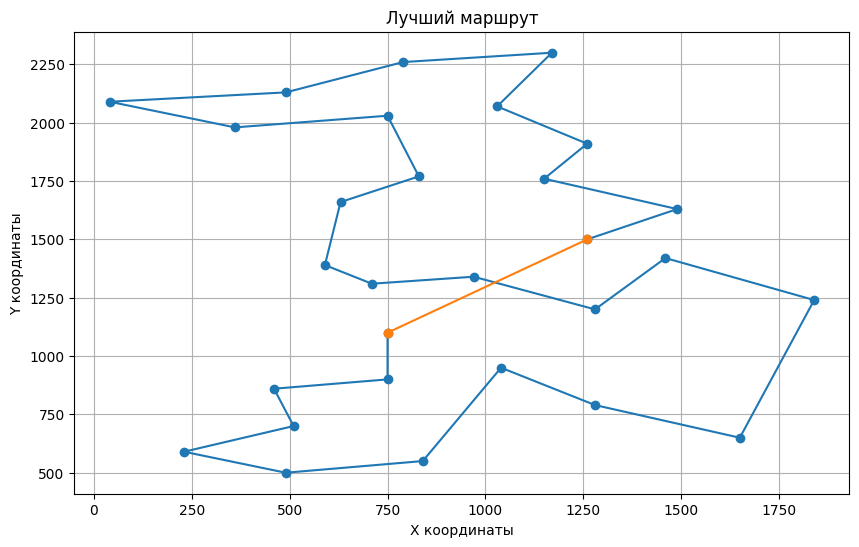

In [89]:
import matplotlib.pyplot as plt

def plot_route(route):
    plt.figure(figsize=(10, 6))
    plt.plot(cities[route][:, 0], cities[route][:, 1], 'o-')
    plt.plot([cities[route[-1], 0], cities[route[0], 0]], [cities[route[-1], 1], cities[route[0], 1]], 'o-')  # Замкнуть маршрут
    plt.title('Лучший маршрут')
    plt.xlabel('X координаты')
    plt.ylabel('Y координаты')
    plt.grid()
    plt.show()

# Визуализация лучшего маршрута
print(best_route)


plot_route(best_route)

In [ ]:
print(theor)
plot_route(theor)